### Importing prerequisite libraries

In [1]:
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the dataset

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784', version=1)

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [6]:
X, y = mnist['data'], mnist['target'].astype(np.uint8)

In [7]:
X.shape, y.shape

((70000, 784), (70000,))

### Plotting a digit

In [8]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=mpl.cm.binary, interpolation='nearest')
    plt.axis("off")

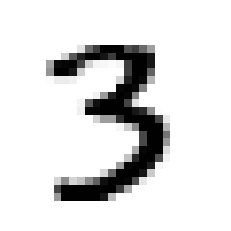

In [9]:
plot_digit(X[10000])

In [10]:
y[10000]

3

### Splitting the data into training set and test set

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Binary classifier on class '2'

In [12]:
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [13]:
from sklearn.linear_model import SGDClassifier

In [14]:
sgd_clf = SGDClassifier()

In [15]:
sgd_clf.fit(X_train, y_train_2)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
sgd_clf.predict([X[360]])

array([ True])

### Evaluating performance

In [17]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [18]:
cross_val_score(sgd_clf, X_train, y_train_2, cv=3, scoring='accuracy')

array([0.97285, 0.9755 , 0.97765])

In [19]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3)

In [20]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [21]:
confusion_matrix(y_train_2, y_train_pred)

array([[52931,  1111],
       [  714,  5244]])

In [22]:
precision_score(y_train_2, y_train_pred)

0.825177025963808

In [23]:
recall_score(y_train_2, y_train_pred)

0.8801611278952669

In [24]:
f1_score(y_train_2, y_train_pred)

0.8517826687241127

In [25]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3, method='decision_function')

In [26]:
from sklearn.metrics import precision_recall_curve

In [27]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [31]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label="Precision")
    plt.plot(thresholds, recalls[:-1], 'g-', label="Recall")
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0,1])

(-60000, 60000)

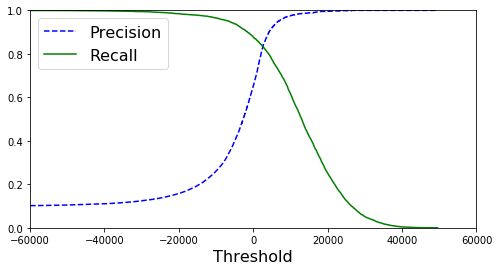

In [32]:
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-60000, 60000])

In [33]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, 'b-')
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0,1,0,1])

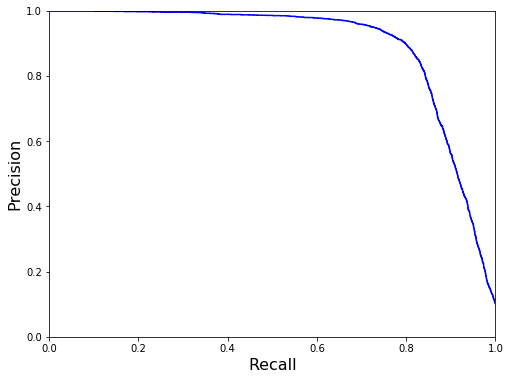

In [34]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

### ROC curve

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

In [36]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_2, y_scores)

In [37]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)

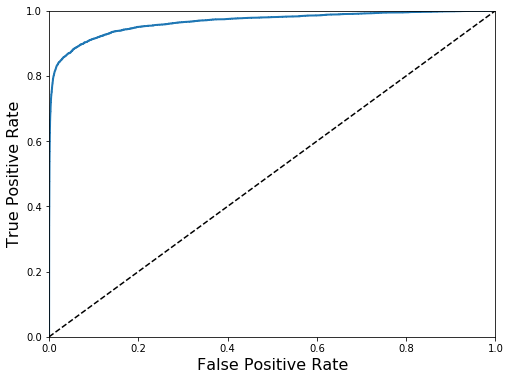

In [38]:
plt.figure(figsize=(8, 6))
plot_roc_curve(false_positive_rate, true_positive_rate)

In [39]:
roc_auc_score(y_train_2, y_scores)

0.9658029798886171

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
forest_clf = RandomForestClassifier()

In [42]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_2, cv=3, method='predict_proba')

In [43]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

In [44]:
fpr_forest, tpr_forest, thresholdssholdssholds_forest = roc_curve(y_train_2, y_scores_forest)

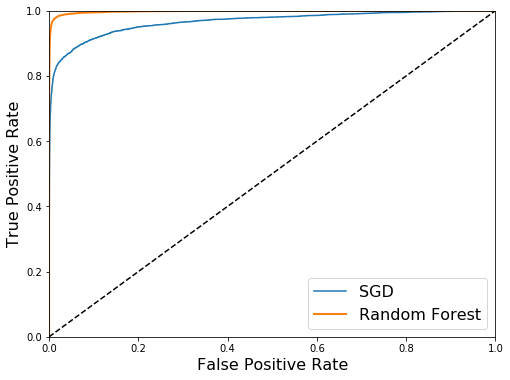

In [45]:
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)

In [46]:
roc_auc_score(y_train_2, y_scores_forest)

0.9975405227013828

In [47]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_2, cv=3)

In [48]:
precision_score(y_train_2, y_train_pred_forest)

0.9869743208038705

In [49]:
recall_score(y_train_2, y_train_pred_forest)

0.8902316213494461